In [30]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SVAR

In [14]:
data = {
    'GDP': [100, 110, 120, 115, 130, 140, 150, 145, 160, 170],
    'Unemployment_Rate': [5.0, 4.5, 4.2, 4.8, 4.1, 3.9, 3.7, 4.0, 3.5, 3.3]
}

df = pd.DataFrame(data)

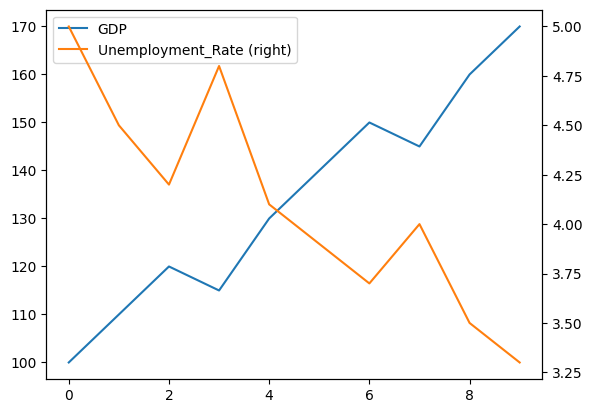

In [15]:
ax = df.plot(secondary_y=['Unemployment_Rate'])

In [16]:
def test_stationarity(series):
    result = adfuller(series)
    p_value = result[1]
    
    if p_value <= 0.05:
        print("A série é estacionária.")
    else:
        print("A série não é estacionária.")

test_stationarity(df['GDP'])
test_stationarity(df['Unemployment_Rate'])

A série não é estacionária.
A série não é estacionária.


In [17]:
df["GDP_diff"] = df["GDP"].diff()
df["Unemployment_Rate_diff"] = df["Unemployment_Rate"].diff()
df_diff = df.drop(columns=["GDP", "Unemployment_Rate"])
df_diff.dropna(inplace=True)
df_diff

,GDP_diff,Unemployment_Rate_diff
1,10.0,-0.5
2,10.0,-0.3
3,-5.0,0.6
4,15.0,-0.7
5,10.0,-0.2
6,10.0,-0.2
7,-5.0,0.3
8,15.0,-0.5
9,10.0,-0.2


<Axes: >

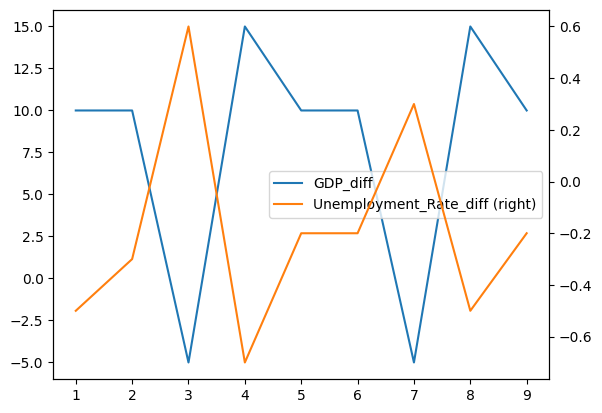

In [19]:
df_diff.plot(secondary_y=['Unemployment_Rate_diff'])

<Axes: xlabel='GDP_diff'>

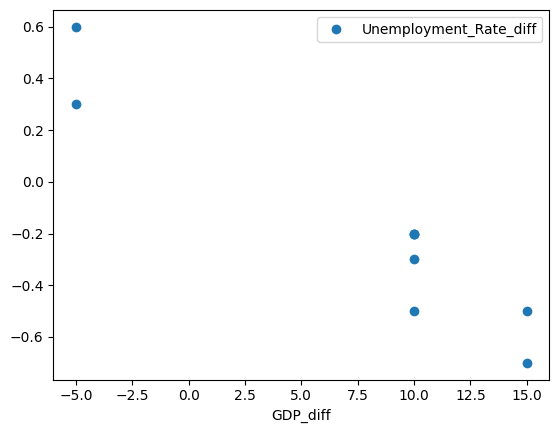

In [21]:
df_diff.plot(x ="GDP_diff", y= "Unemployment_Rate_diff" ,style="o")

In [27]:
# Create the SVAR model
svar_model = SVAR(df_diff, svar_type='A')

# Specify the order of the lags (2 in this example)
svar_result = svar_model.svar(p=2)

# Identify the Cholesky decomposition to associate shocks with variables
svar_result.identify_chol()

# Fit the model
svar_result = svar_result.fit()

/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: SVAR of type A or AB but A array not given.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SVAR
# Generate some random data for demonstration purposes
np.random.seed(0)
nobs = 100
nvar = 3
endog = np.random.randn(nobs, nvar)
exog = np.random.randn(nobs, nvar)
# Define the SVAR model
model = SVAR(endog, exog)
results = model.fit()
# Print the summary of the model results
print(results.summary())
# Forecast the next 5 observations
forecast = results.forecast(steps=5)
# Plot the actual vs forecasted values
plt.figure(figsize=(8,6))
plt.plot(endog[:-5], label='Actual')
plt.plot(forecast, label='Forecasted')
plt.legend()
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()